In [1]:
## Importing Libraries

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [20]:
## Data Preprocessing
# Training Image Preprocessing

In [21]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 7392 files belonging to 5 classes.


In [22]:
#Validation Image Preprocessing
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2160 files belonging to 5 classes.


In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50

In [24]:
# Define the ResNet32 model
def create_resnet32_model(input_shape, num_classes):
    # Load the ResNet50 model trained on ImageNet without the top (classification) layer
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    
    # Freeze the layers in the base ResNet50 model
    for layer in base_model.layers:
        layer.trainable = False
    
    # Create a new model on top of the ResNet50 base model
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    return model


In [25]:
# Set input shape and number of classes
input_shape = (128, 128, 3)  # Assuming images are resized to 128x128
num_classes = len(training_set.class_names)

# Create the ResNet32 model
resnet32_model = create_resnet32_model(input_shape, num_classes)

# Compile the model
resnet32_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

In [27]:
resnet32_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ ?                           │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [28]:
# Train the model
history = resnet32_model.fit(training_set,
                              validation_data=validation_set,
                              epochs=10)

Epoch 1/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 234s 980ms/step - accuracy: 0.6450 - loss: 0.9753 - val_accuracy: 0.8296 - val_loss: 0.4173
Epoch 2/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 229s 993ms/step - accuracy: 0.8238 - loss: 0.4173 - val_accuracy: 0.8963 - val_loss: 0.2880
Epoch 3/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 247s 1s/step - accuracy: 0.8781 - loss: 0.3084 - val_accuracy: 0.9139 - val_loss: 0.2358
Epoch 4/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 250s 1s/step - accuracy: 0.9058 - loss: 0.2368 - val_accuracy: 0.9199 - val_loss: 0.2186
Epoch 5/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 246s 1s/step - accuracy: 0.9124 - loss: 0.2161 - val_accuracy: 0.9435 - val_loss: 0.1666
Epoch 6/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.9286 - loss: 0.1817 - val_accuracy: 0.9287 - val_loss: 0.1861
Epoch 7/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 248s 1s/step - accuracy: 0.9314 - loss: 0.1699 - val_accuracy: 0.9505 - val_loss: 0.1427
Epoch 8/10
231/231 ━━━━━━━━━━━━━━━━━━━━ 228s 986ms/step - accuracy: 0.9484 - loss: 0.1321 -

In [29]:
# Evaluate the model
loss, accuracy = resnet32_model.evaluate(validation_set)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')

68/68 ━━━━━━━━━━━━━━━━━━━━ 50s 729ms/step - accuracy: 0.9364 - loss: 0.1694
Validation Loss: 0.14945967495441437, Validation Accuracy: 0.9462962746620178


In [30]:
# Some other metrics for model evaluation

In [31]:
class_name = validation_set.class_names
class_name

['Cauliflower_Healthy',
 'Cauliflower_Healthy_Leaf',
 'Cauliflower_Leaf_Black_Rot',
 'Cauliflower_Leaf_Red_Spot',
 'Cauliflower_Spot_Rot']

In [32]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2160 files belonging to 5 classes.


In [34]:
y_pred = resnet32_model.predict(test_set)
y_pred,y_pred.shape

2160/2160 ━━━━━━━━━━━━━━━━━━━━ 109s 50ms/step


(array([[9.9999988e-01, 9.2736357e-17, 5.4695056e-15, 3.0014340e-16,
         9.9274807e-08],
        [9.9999988e-01, 1.9702661e-16, 8.9136852e-15, 4.0980142e-17,
         9.4661679e-08],
        [1.0000000e+00, 3.3893393e-14, 2.0565286e-12, 1.2152923e-15,
         4.4549530e-08],
        ...,
        [3.4739531e-04, 1.4602082e-13, 1.1465318e-11, 6.8887750e-15,
         9.9965262e-01],
        [2.3162481e-04, 1.7937827e-12, 2.5375218e-11, 5.1071000e-15,
         9.9976844e-01],
        [1.5942939e-03, 4.2531629e-12, 2.0846345e-11, 5.1135188e-16,
         9.9840575e-01]], dtype=float32),
 (2160, 5))

In [35]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [36]:
predicted_categories

<tf.Tensor: shape=(2160,), dtype=int64, numpy=array([0, 0, 0, ..., 4, 4, 4], dtype=int64)>

In [37]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(2160, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)>

In [38]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(2160,), dtype=int64, numpy=array([0, 0, 0, ..., 4, 4, 4], dtype=int64)>

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                            precision    recall  f1-score   support

       Cauliflower_Healthy       0.94      1.00      0.97       420
  Cauliflower_Healthy_Leaf       0.98      0.96      0.97       624
Cauliflower_Leaf_Black_Rot       0.85      0.95      0.90       372
 Cauliflower_Leaf_Red_Spot       0.96      0.88      0.92       372
      Cauliflower_Spot_Rot       1.00      0.92      0.96       372

                  accuracy                           0.95      2160
                 macro avg       0.95      0.94      0.94      2160
              weighted avg       0.95      0.95      0.95      2160



In [41]:
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

(5, 5)

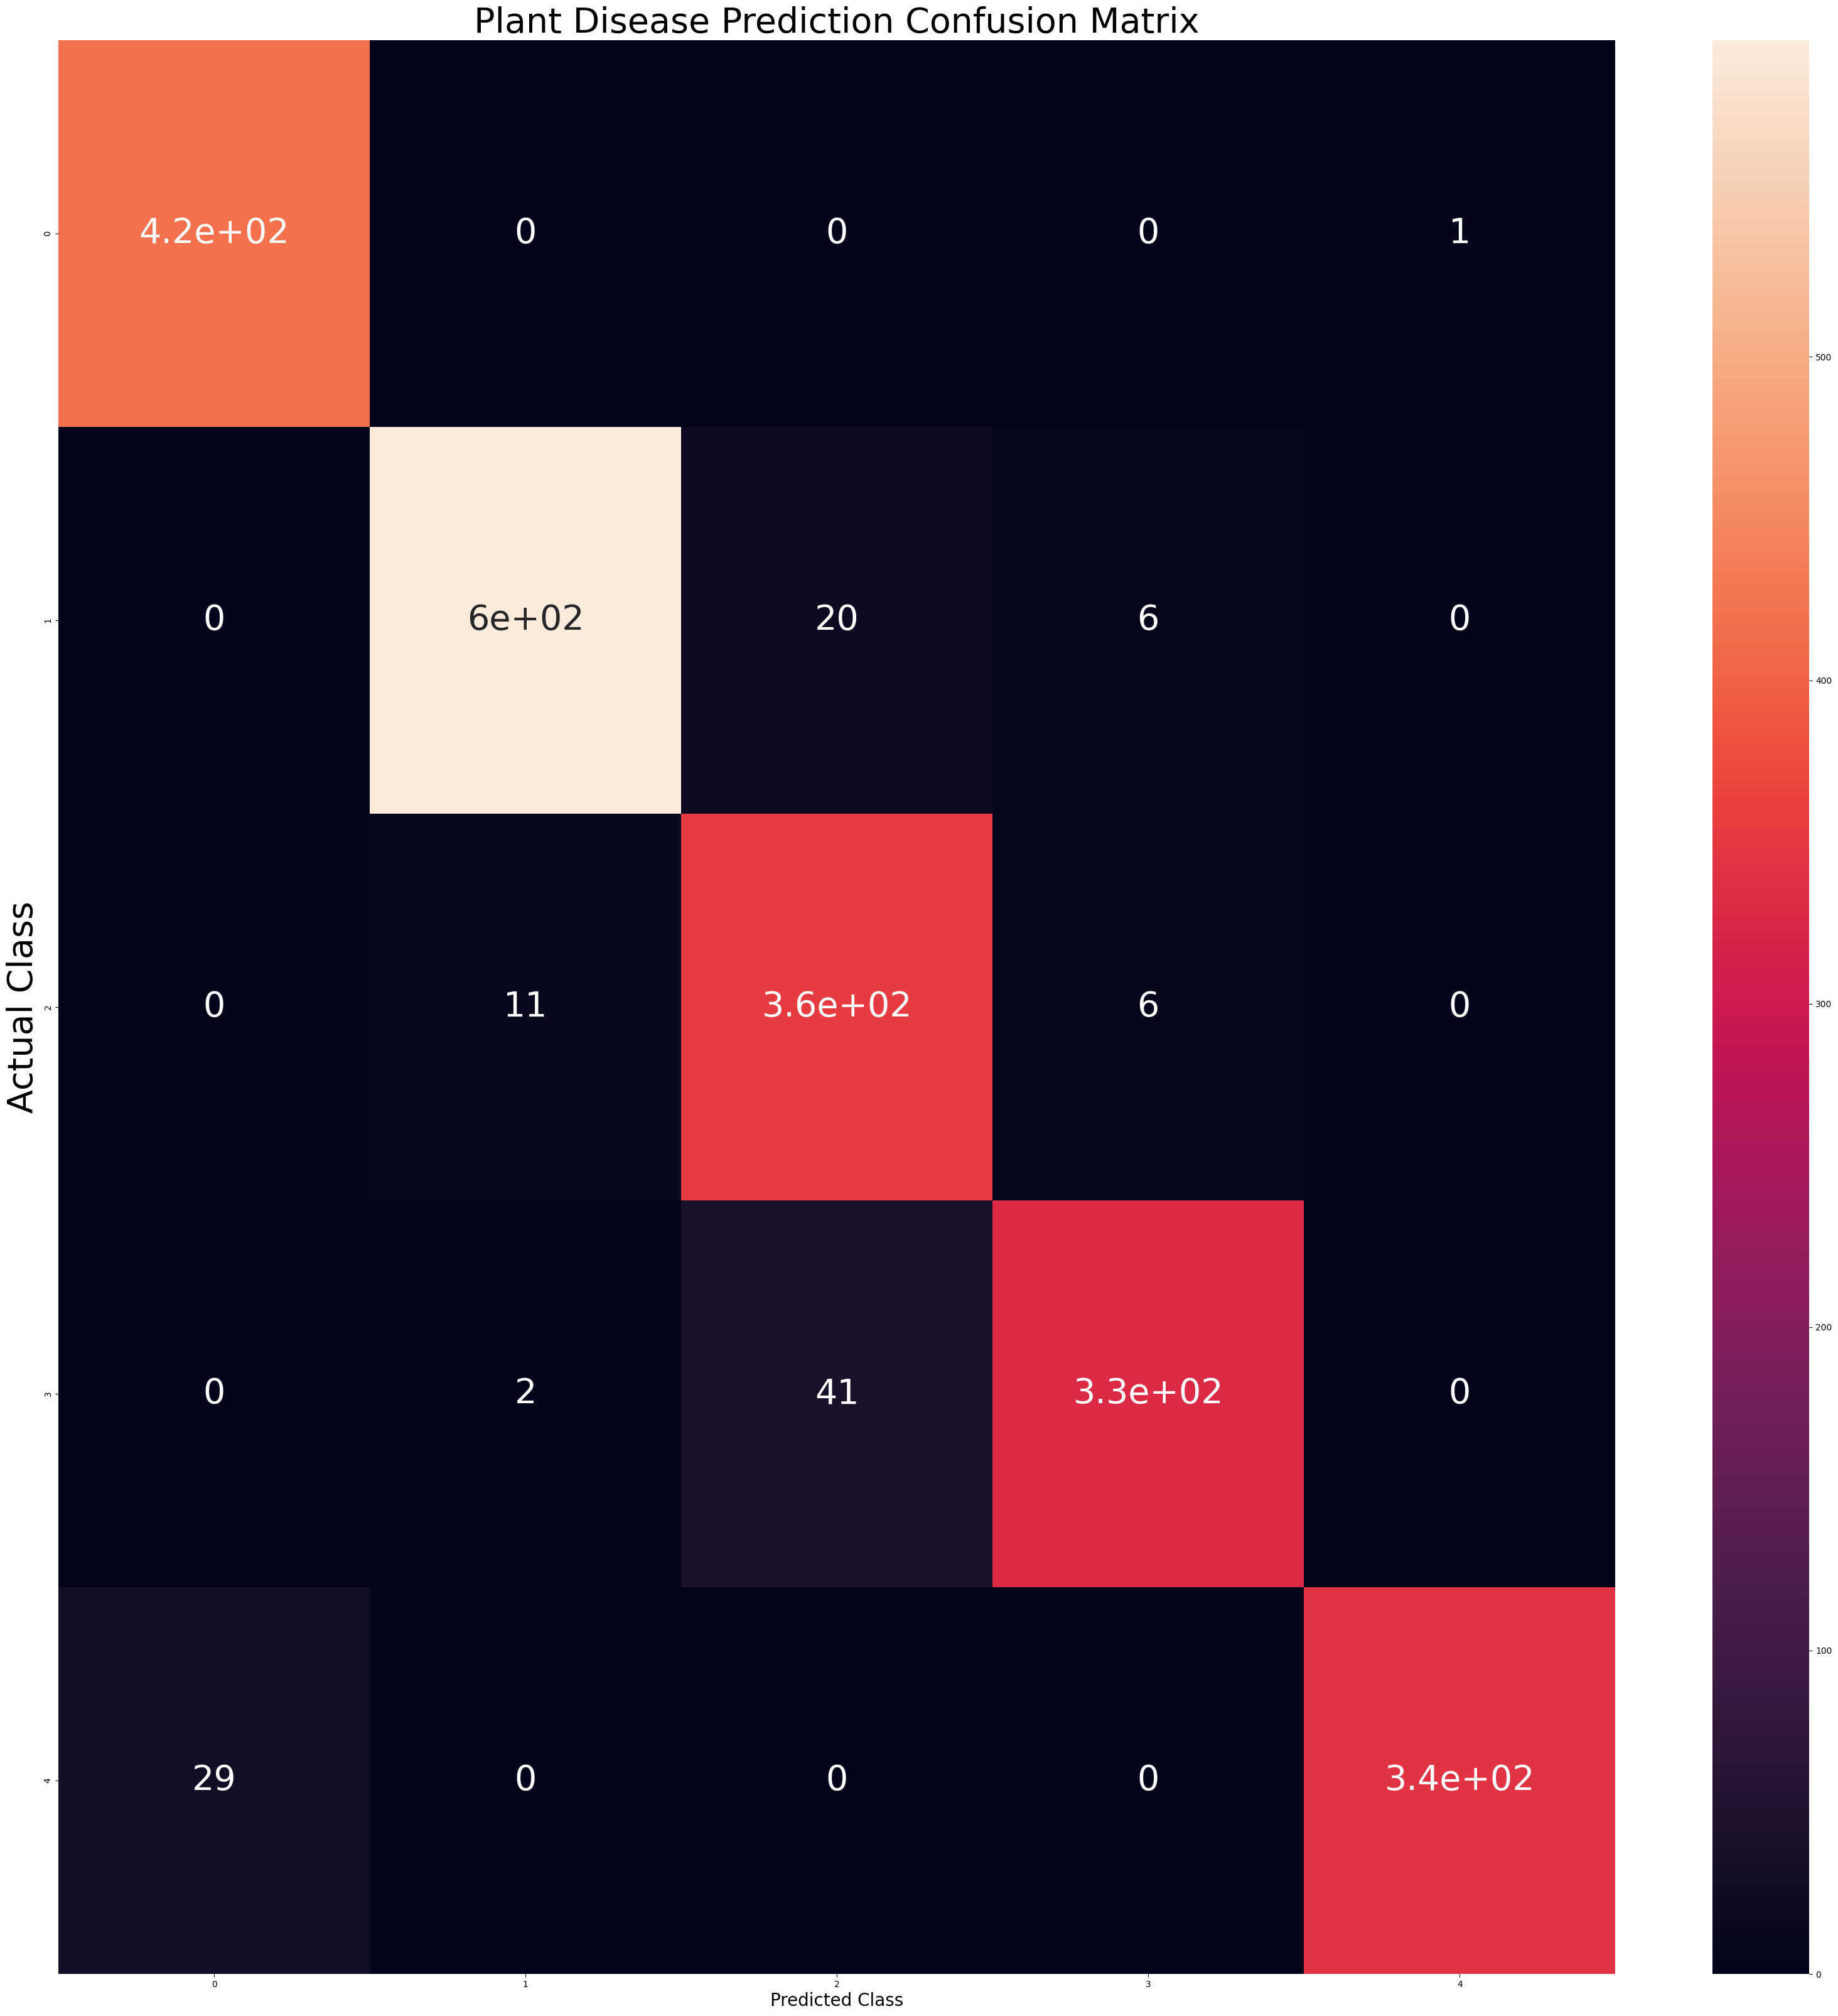

In [42]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 40})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 40)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 40)
plt.show()